DATASET INFORMATION:



Air Quality Data Set 
Abstract: Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

Data Set Characteristics:  

Multivariate, Time-Series

Number of Instances:

9358

Area:

Computer

Attribute Characteristics:

Real

Number of Attributes:

15

Date Donated

2016-03-23

Associated Tasks:

Regression

Missing Values?

Yes

Number of Web Hits:

160639


Source:

Saverio De Vito (saverio.devito '@' enea.it), ENEA - National Agency for New Technologies, Energy and Sustainable Economic Development


Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. 
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded. 


Attribute Information:

0 Date	(DD/MM/YYYY) 
1 Time	(HH.MM.SS) 
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	
7 True hourly averaged NOx concentration in ppb (reference analyzer) 
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
12 Temperature in Â°C	
13 Relative Humidity (%) 
14 AH Absolute Humidity 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dfc = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")

We first try to clean the data by visualising any NA/null values in the data set. 

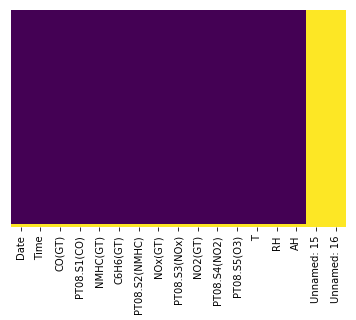

In [3]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As from the above heatmap, we can see that the last two columns are completely empty and hence we can eliminate them.

In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [5]:
dfc.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [6]:
dfc.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [7]:
dfc.Date.isnull().values.any()

True

In [8]:
dfc

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [9]:
dfc.dropna(axis=0, how= 'all', inplace=True)

In [10]:
dfc.dropna(axis=1, inplace=True)

In [11]:
dfc

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


Now the data is free of all the null values, but there are more unknown values which are -200 in value, as given in the description of the dataset.These -200 values in the data should be imputed with appropriate values (or be removed).

In [12]:
dfc.shape

(9357, 15)

As the dataset desciption states that the missing values are substituted by the value -200, we need to perform imputation to replace those values as these -200 values will mess up our statistical measures and graphs/correlation.

First ley us replace the dummy value of -200 by NaN throughout the dataset.

In [13]:
dfc.replace(to_replace= -200, value= np.NaN, inplace= True)

Now let us visualize the distribution of the null values using a heatmap.

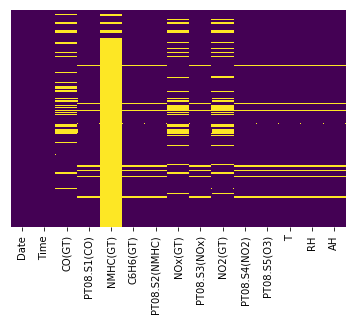

In [14]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


manipulating the date and time columns to make them into a single column of DateTime object. Also, converting date to the datetime object and proper format.

In [16]:
dfc['DateTime'] = dfc['Date']+ ' ' + dfc['Time']

In [17]:
dfc.drop(['Time'], axis=1, inplace=True)

In [18]:
dfc['DateTime'] = pd.to_datetime(dfc['DateTime'].astype(str), format='%d/%m/%Y %H.%M.%S')

In [19]:
dfc['Date'] = pd.to_datetime(dfc['Date'].astype(str), format='%d/%m/%Y')

In [20]:
#dfc['Time'] = pd.to_datetime(dfc['Time'].astype(str), format='%H.%M.%S') 

In [21]:
dfc[['CO(GT)','C6H6(GT)','T','RH','AH']] = dfc[['CO(GT)','C6H6(GT)','T','RH','AH']].apply(pd.to_numeric)

In [22]:
import datetime

In [23]:
#Making a new column year, which may be useful to visualize yearly trends or year averages or measures.
dfc['Year'] = dfc['DateTime'].map(lambda x:x.year)

In [24]:
#Making a new column YearMonth, which may be useful to visualize monthly trends or year averages or measures.
dfc['YearMonth'] = pd.to_datetime(dfc.DateTime).dt.to_period('m')

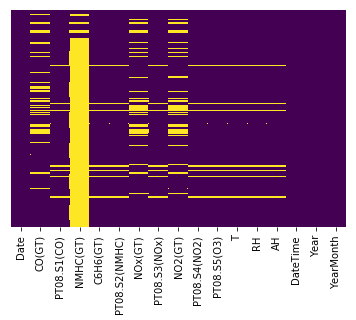

In [25]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see the NHMC(GT) column is missing many values, more than 85% values are NaN. Thus we can remove this column from the dataset as these values are very less likely to be of any significant importance in this dataset.

In [26]:
dfc.drop(['NMHC(GT)'], axis= 1, inplace= True)

Now let us get the value-counts of values in the columns to look at the number of NaN values present in each column.

In [27]:
dfc['T'].value_counts(dropna= False)

NaN      366
 20.8     57
 21.3     54
 20.2     51
 13.8     51
 15.6     49
 12.0     49
 12.3     49
 16.3     48
 19.8     48
 14.5     47
 14.6     47
 13.4     46
 17.8     46
 21.7     46
 13.7     46
 19.3     46
 16.0     45
 13.5     45
 14.8     45
 13.3     45
 14.1     44
 23.7     44
 19.7     43
 13.1     43
 15.5     43
 11.3     41
 15.8     41
 20.3     41
 14.0     41
        ... 
 40.6      2
 42.0      2
 38.6      2
 42.5      1
-1.1       1
 44.3      1
-0.3       1
 41.6      1
 41.0      1
 42.7      1
 40.9      1
-0.2       1
 1.1       1
 43.4      1
 0.7       1
-1.4       1
 0.0       1
-0.5       1
 0.5       1
 44.6      1
 0.1       1
 39.4      1
-1.9       1
 43.1      1
 41.7      1
 1.7       1
 40.7      1
 36.7      1
 42.6      1
-1.2       1
Name: T, Length: 437, dtype: int64

In [28]:
dfc['CO(GT)'].value_counts(dropna= False)

NaN      1683
 1.0      305
 1.4      279
 1.6      275
 1.5      273
 1.1      262
 0.7      260
 1.7      258
 1.3      253
 0.8      251
 0.9      248
 1.2      247
 0.6      244
 1.9      232
 2.0      221
 2.1      218
 0.5      217
 2.2      202
 2.3      191
 1.8      185
 2.4      172
 2.6      161
 0.4      160
 2.5      152
 2.7      149
 2.8      136
 3.1      118
 2.9      118
 3.0      114
 3.4      113
         ... 
 6.0        8
 6.7        8
 7.5        6
 6.9        5
 8.0        5
 8.4        5
 7.3        5
 7.7        4
 7.2        4
 8.6        4
 8.7        3
 7.9        3
 7.4        3
 8.1        3
 10.2       2
 7.8        2
 7.1        2
 9.1        2
 8.3        2
 9.4        1
 7.0        1
 9.2        1
 8.5        1
 9.9        1
 7.6        1
 11.5       1
 10.1       1
 9.3        1
 9.5        1
 11.9       1
Name: CO(GT), Length: 97, dtype: int64

In [29]:
dfc['NOx(GT)'].value_counts(dropna= False)

NaN        1639
 89.0        41
 65.0        37
 122.0       36
 93.0        36
 41.0        36
 95.0        35
 132.0       35
 180.0       35
 120.0       34
 51.0        34
 102.0       33
 104.0       32
 103.0       32
 98.0        32
 72.0        32
 57.0        32
 112.0       32
 111.0       32
 46.0        32
 61.0        32
 166.0       32
 96.0        31
 108.0       31
 115.0       31
 144.0       31
 147.0       30
 118.0       30
 87.0        30
 127.0       30
           ... 
 984.0        1
 859.0        1
 400.0        1
 1132.0       1
 673.0        1
 1310.0       1
 1195.0       1
 892.0        1
 692.0        1
 814.0        1
 718.0        1
 1134.0       1
 618.0        1
 903.0        1
 634.0        1
 825.0        1
 1182.0       1
 637.0        1
 708.0        1
 1020.0       1
 1145.0       1
 819.0        1
 771.0        1
 1065.0       1
 1148.0       1
 810.0        1
 928.0        1
 900.0        1
 784.0        1
 797.0        1
Name: NOx(GT), Length: 9

In [30]:
dfc['NO2(GT)'].value_counts(dropna= False)

NaN       1642
 97.0       78
 117.0      77
 119.0      77
 114.0      75
 95.0       75
 101.0      75
 110.0      74
 115.0      73
 116.0      72
 107.0      72
 102.0      71
 121.0      71
 127.0      71
 96.0       71
 99.0       70
 112.0      70
 81.0       70
 111.0      70
 68.0       69
 106.0      69
 89.0       68
 94.0       68
 120.0      68
 93.0       67
 69.0       66
 83.0       65
 91.0       65
 122.0      64
 90.0       64
          ... 
 275.0       2
 289.0       2
 242.0       2
 260.0       2
 3.0         1
 274.0       1
 257.0       1
 322.0       1
 295.0       1
 261.0       1
 285.0       1
 237.0       1
 306.0       1
 291.0       1
 333.0       1
 309.0       1
 281.0       1
 340.0       1
 7.0         1
 326.0       1
 278.0       1
 13.0        1
 301.0       1
 310.0       1
 296.0       1
 312.0       1
 256.0       1
 253.0       1
 2.0         1
 284.0       1
Name: NO2(GT), Length: 284, dtype: int64

We can try to replace these NaN values by taking the mean or the median of the whole column, but this won't be accurate and proper way to fill those values. 
Thus, filling the mean of that perticular day in which day the value is NaN makes more sense and would be proper way to impute the values. Hence, we groupby the date and take the mean and replace any NaN value by the mean of the values of that day.

In [31]:
dfc["T"] = dfc.groupby("Date")["T"].transform(lambda x: x.fillna(x.mean()))

In [32]:
dfc["CO(GT)"] = dfc.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))

In [33]:
dfc["NOx(GT)"] = dfc.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
dfc["NO2(GT)"] = dfc.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

Checking for the number of mean values again in each column.

In [34]:
dfc['T'].value_counts(dropna= False)

NaN           192
 12.000000     72
 23.700000     62
 20.800000     57
 21.300000     54
 13.800000     51
 20.200000     51
 15.600000     49
 12.300000     49
 16.300000     48
 19.800000     48
 14.500000     47
 14.600000     47
 21.700000     46
 13.700000     46
 17.800000     46
 19.300000     46
 13.400000     46
 13.300000     45
 13.500000     45
 14.800000     45
 16.000000     45
 14.100000     44
 19.700000     43
 15.500000     43
 13.100000     43
 20.300000     41
 14.000000     41
 11.300000     41
 15.800000     41
             ... 
 0.000000       1
 11.291304      1
 43.400000      1
-0.300000       1
-0.500000       1
 0.500000       1
 44.600000      1
-1.100000       1
 42.700000      1
 43.100000      1
 1.700000       1
 36.700000      1
 42.600000      1
 41.600000      1
 41.000000      1
 14.500000      1
 44.300000      1
-1.400000       1
 1.100000       1
 31.100000      1
 42.500000      1
-1.200000       1
-0.200000       1
 40.900000      1
 39.400000

In [35]:
dfc['CO(GT)'].value_counts(dropna= False)

NaN          864
 1.000000    305
 1.600000    298
 0.800000    297
 1.400000    280
 1.500000    273
 1.200000    270
 1.100000    262
 0.700000    260
 1.700000    258
 1.300000    253
 0.900000    248
 0.600000    244
 1.900000    232
 2.000000    221
 2.100000    220
 0.500000    217
 2.200000    203
 2.300000    191
 1.800000    185
 2.400000    172
 2.600000    161
 0.400000    160
 2.700000    155
 2.500000    152
 2.800000    136
 3.100000    118
 2.900000    118
 3.000000    114
 3.400000    113
            ... 
 3.208696      1
 2.069565      1
 1.843478      1
 1.873913      1
 1.995652      1
 1.691304      1
 1.334783      1
 2.073913      1
 2.365217      1
 2.673913      1
 2.552174      1
 1.195652      1
 1.791304      1
 2.286957      1
 1.486957      1
 3.504348      1
 2.604348      1
 2.134783      1
 2.265217      1
 2.186957      1
 1.300000      1
 1.543478      1
 3.117391      1
 3.273913      1
 2.056522      1
 2.534783      1
 9.300000      1
 2.173913     

In [36]:
dfc['NOx(GT)'].value_counts(dropna= False)

NaN             816
 127.000000      52
 176.000000      49
 165.000000      46
 76.000000       42
 89.000000       41
 65.000000       37
 93.000000       36
 132.000000      36
 130.000000      36
 41.000000       36
 122.000000      36
 180.000000      35
 95.000000       35
 120.000000      34
 51.000000       34
 102.000000      33
 98.000000       32
 57.000000       32
 104.000000      32
 112.000000      32
 166.000000      32
 72.000000       32
 61.000000       32
 46.000000       32
 111.000000      32
 103.000000      32
 96.000000       31
 87.000000       31
 115.000000      31
               ... 
 881.000000       1
 319.565217       1
 824.000000       1
 936.000000       1
 790.000000       1
 121.086957       1
 709.000000       1
 895.000000       1
 204.652174       1
 161.434783       1
 791.000000       1
 147.434783       1
 96.869565        1
 731.000000       1
 1201.000000      1
 242.260870       1
 225.347826       1
 327.173913       1
 236.478261       1


In [37]:
dfc['NO2(GT)'].value_counts(dropna= False)

NaN            816
 101.000000    121
 97.000000      79
 117.000000     77
 119.000000     77
 114.000000     75
 95.000000      75
 110.000000     74
 115.000000     73
 116.000000     72
 107.000000     72
 121.000000     71
 118.000000     71
 102.000000     71
 112.000000     71
 96.000000      71
 127.000000     71
 81.000000      70
 99.000000      70
 111.000000     70
 89.000000      69
 68.000000      69
 125.000000     69
 106.000000     69
 94.000000      68
 120.000000     68
 93.000000      67
 69.000000      66
 83.000000      65
 128.000000     65
              ... 
 333.000000      1
 296.000000      1
 124.086957      1
 93.086957       1
 162.217391      1
 111.173913      1
 77.304348       1
 62.913043       1
 125.130435      1
 93.956522       1
 55.956522       1
 74.652174       1
 97.086957       1
 118.739130      1
 102.826087      1
 104.521739      1
 104.391304      1
 105.130435      1
 105.304348      1
 122.217391      1
 309.000000      1
 100.217391 

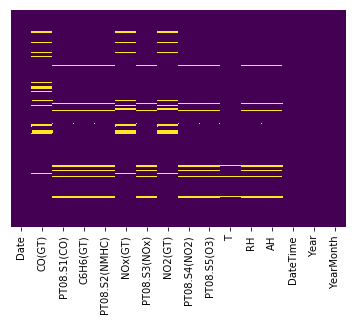

In [38]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see there are still some NaN values, this is because for these values, and for their corresponding date all the values for that date are NaN, hence the mean is also NaN. 
For this case, we fill these values using Forward Fill way inside the fillna function, using method 'ffill'.
We use forward fill here as even now taking the nean of the whole column(which has values for an entire year) does not make sense. Hence as these are hourly values, we can assume strong relationship between consecutive values for gas concentrations and humidity, and thus forward fill will be a very good method to fill thses values instead of dropping these records.

In [39]:
dfc.fillna(method='ffill', inplace= True)

In [40]:
dfc.isnull().any().any()

False

In [41]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
Date             9357 non-null datetime64[ns]
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
DateTime         9357 non-null datetime64[ns]
Year             9357 non-null int64
YearMonth        9357 non-null object
dtypes: datetime64[ns](2), float64(12), int64(1), object(1)
memory usage: 1.2+ MB


In [42]:
dfc.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082589,1102.730362,10.190392,942.548253,239.419651,832.742225,109.382418,1453.014535,1030.511916,18.167474,48.817431,1.017382,2004.240141
std,1.383347,219.588101,7.565771,269.581368,200.833596,255.709423,46.058214,347.434084,410.916759,8.833685,17.354326,0.404829,0.427192
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004.000000
25%,1.100000,938.000000,4.400000,733.000000,102.000000,655.000000,76.000000,1228.000000,726.000000,11.500000,35.400000,0.726200,2004.000000
50%,1.700000,1062.000000,8.300000,911.000000,177.000000,807.000000,103.608696,1460.000000,964.000000,17.600000,48.900000,0.987500,2004.000000
75%,2.700000,1237.000000,14.000000,1117.000000,316.000000,968.000000,135.000000,1677.000000,1287.000000,24.300000,61.900000,1.306700,2004.000000
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005.000000


The describe method is used to find the summar statistics for every column. We get mean of values, standard devistion, minimum value,maximum value and 25%, 50% and 75% quartiles.

Now that the data is all cleaned and free of NaN values, we can start the EDA.

Plots and Exploratory Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1492e5c0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a15c4a240>], dtype=object)

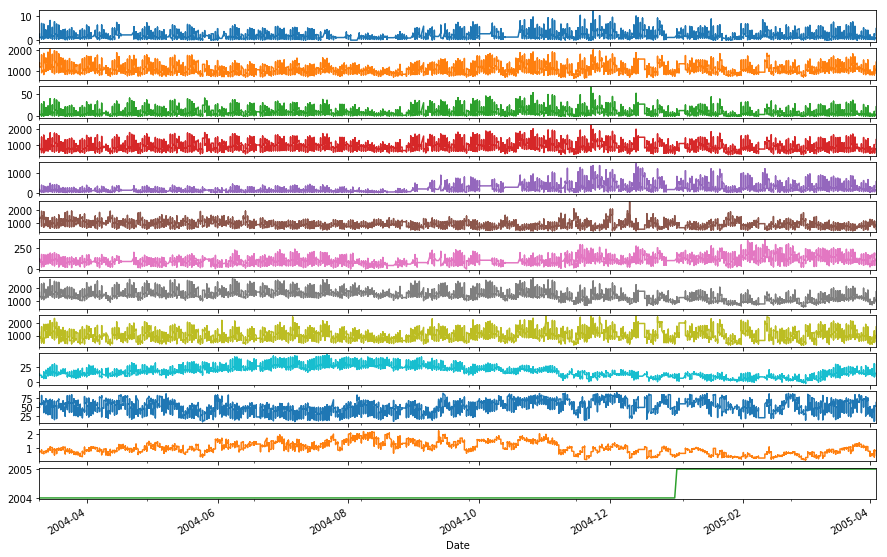

In [43]:
dfc.plot(x='Date',subplots=True, figsize=(15, 10),legend=False)

The below plots shows us a rough trend of the values through the dates, this graph can be substituted further in terms of dates to look for clear characteristics. This plot is similar to time series ploting function tsplot, but tsplot is going to be removed from the python releases in the future.

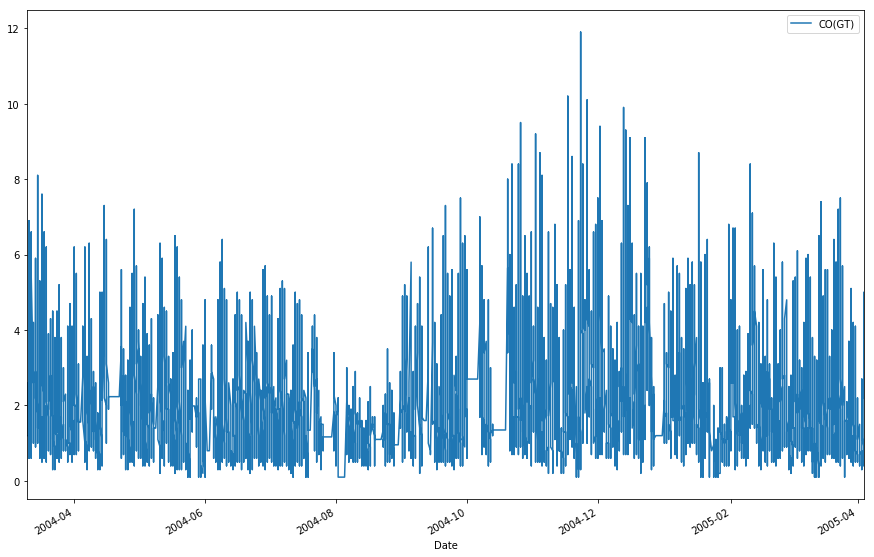

In [44]:
plt.figure(); dfc.plot(x='Date',y='CO(GT)',figsize=(15, 10)); plt.legend(loc='best')

distplots for all the columns. Distplot provides a quick way to look at the univariate distribution.

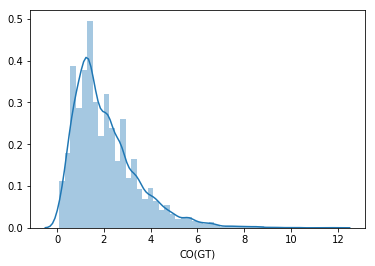

In [45]:
sns.distplot(dfc["CO(GT)"])

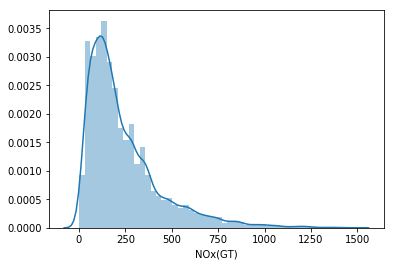

In [46]:
sns.distplot(dfc["NOx(GT)"])

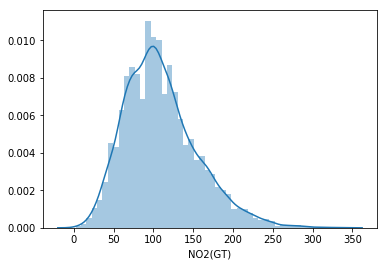

In [47]:
sns.distplot(dfc["NO2(GT)"])

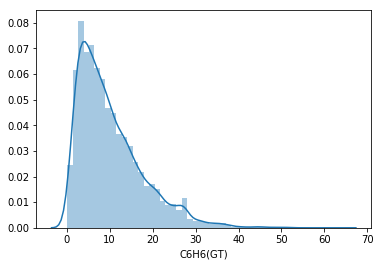

In [48]:
sns.distplot(dfc["C6H6(GT)"])

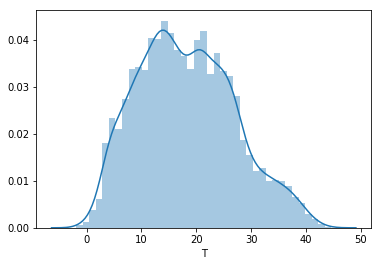

In [49]:
sns.distplot(dfc["T"])

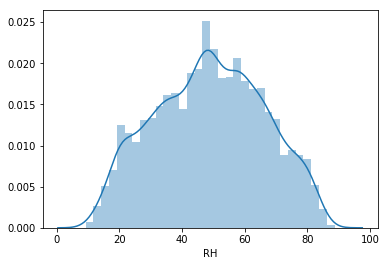

In [50]:
sns.distplot(dfc["RH"])

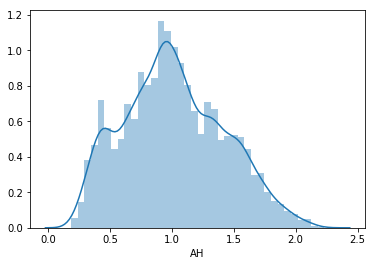

In [51]:
sns.distplot(dfc["AH"])

The monthly characteristics of the gases concentration mgm/m3.(meter cube)

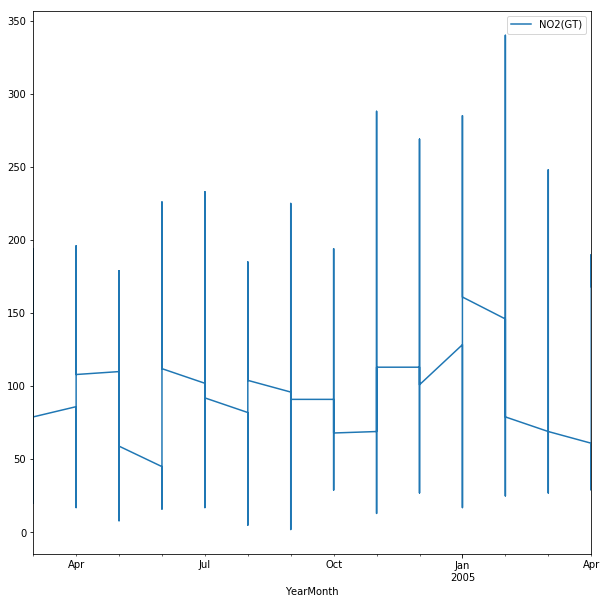

In [52]:
dfc.plot(x='YearMonth', y='NO2(GT)', kind='line',figsize=(10,10))

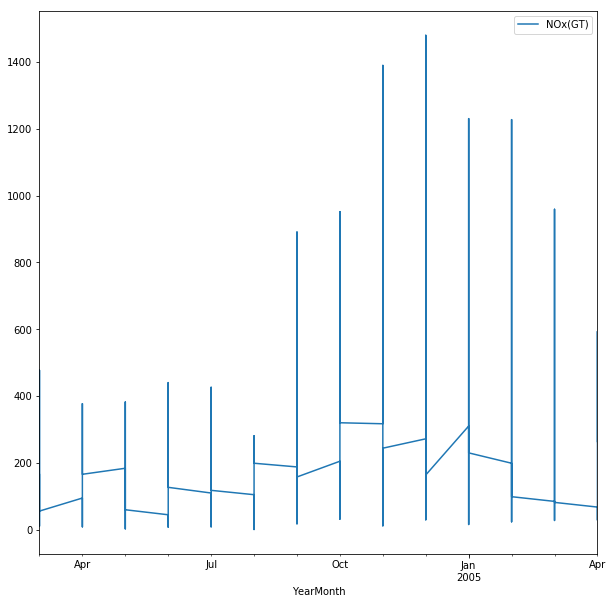

In [53]:
dfc.plot(x='YearMonth', y='NOx(GT)', kind='line',figsize=(10,10))

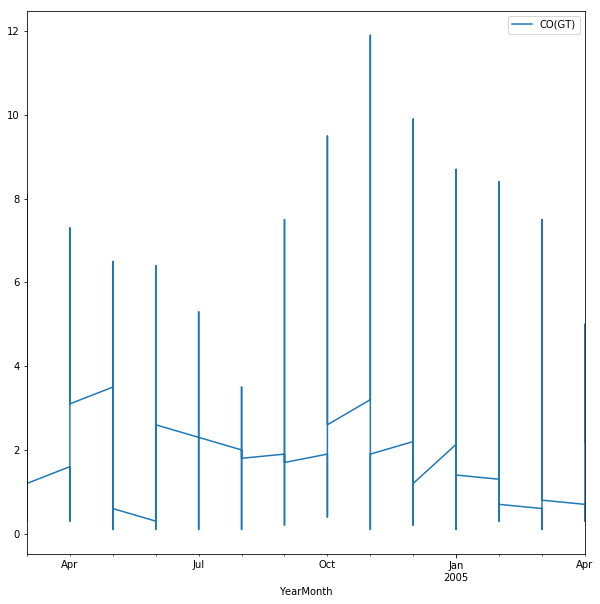

In [54]:
dfc.plot(x='YearMonth', y='CO(GT)', kind='line',figsize=(10,10))

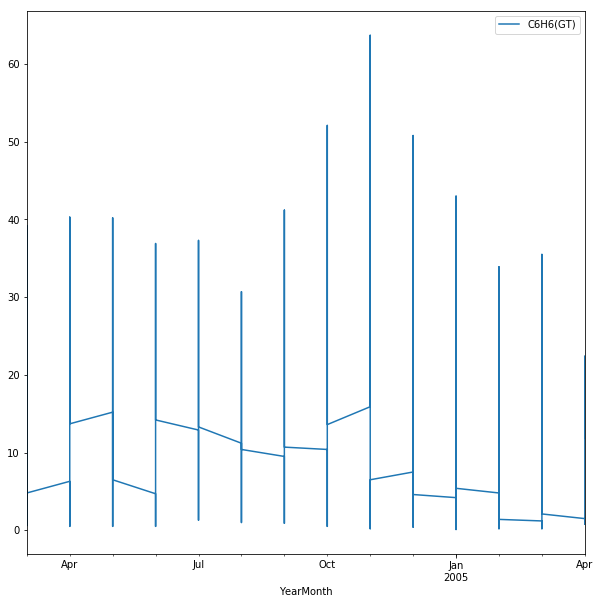

In [55]:
dfc.plot(x='YearMonth', y='C6H6(GT)', kind='line',figsize=(10,10))

We can also visualize the growth or decline of gas concentrations per month as plotted below.

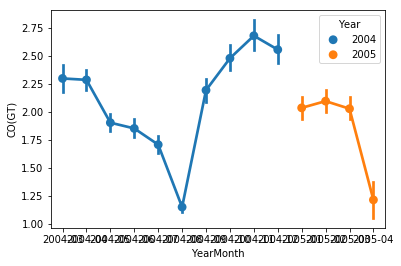

In [56]:
sns.pointplot(x="YearMonth", y="CO(GT)", hue="Year", data=dfc)

By seeing the above plot we can make inferences such as , we can see that there was a declining trend in CO concentration from 03/2004 till 08/2004, from where it started rising again. But the concentrations of first 4 months of 2005 are less than that of 2004 ones in general.

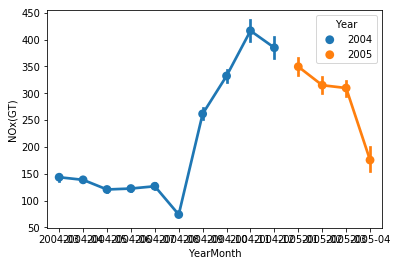

In [57]:
sns.pointplot(x="YearMonth", y="NOx(GT)", hue="Year", data=dfc)

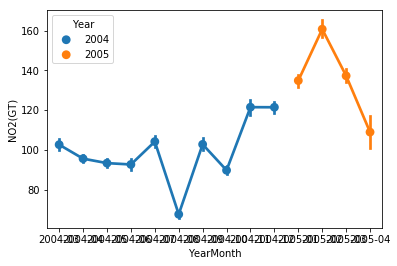

In [58]:
sns.pointplot(x="YearMonth", y="NO2(GT)", hue="Year", data=dfc)

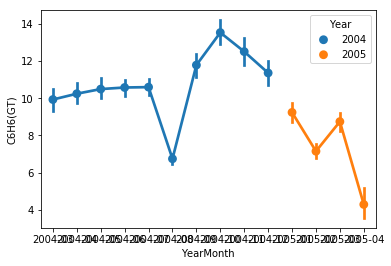

In [59]:
sns.pointplot(x="YearMonth", y="C6H6(GT)", hue="Year", data=dfc)

Now let us examine relationships between the attributes and their yearly pattern using pairplot, with hue year.
Here, making the extra eature year initialy comes handy as it quikly let us visualize the yearly trend as well here in the pairplot, along with the relationship function.

In [89]:
sns.pairplot(dfc, hue='Year')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


The pairplot above helps us analyse the relationships of variables with each other.As we can see except the temperature, Relative and Absolute humidity attributes, almost all of the other attributes show significant (though not exact) linear dependency with each other.

In [62]:
dfc.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082589,1102.730362,10.190392,942.548253,239.419651,832.742225,109.382418,1453.014535,1030.511916,18.167474,48.817431,1.017382,2004.240141
std,1.383347,219.588101,7.565771,269.581368,200.833596,255.709423,46.058214,347.434084,410.916759,8.833685,17.354326,0.404829,0.427192
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004.000000
25%,1.100000,938.000000,4.400000,733.000000,102.000000,655.000000,76.000000,1228.000000,726.000000,11.500000,35.400000,0.726200,2004.000000
50%,1.700000,1062.000000,8.300000,911.000000,177.000000,807.000000,103.608696,1460.000000,964.000000,17.600000,48.900000,0.987500,2004.000000
75%,2.700000,1237.000000,14.000000,1117.000000,316.000000,968.000000,135.000000,1677.000000,1287.000000,24.300000,61.900000,1.306700,2004.000000
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005.000000


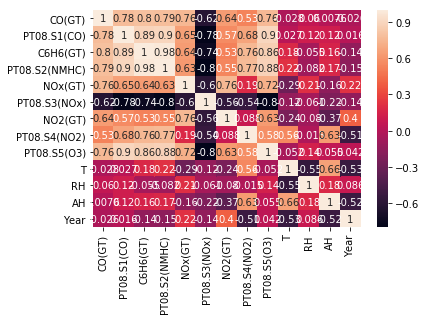

In [63]:
sns.heatmap(dfc.corr(), annot=True)

In [64]:
#correlation values table
print(dfc.corr())

                 CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.781841  0.803253       0.788371  0.758892   
PT08.S1(CO)    0.781841     1.000000  0.886325       0.896015  0.651010   
C6H6(GT)       0.803253     0.886325  1.000000       0.982485  0.641097   
PT08.S2(NMHC)  0.788371     0.896015  0.982485       1.000000  0.625352   
NOx(GT)        0.758892     0.651010  0.641097       0.625352  1.000000   
PT08.S3(NOx)  -0.616421    -0.777913 -0.737702      -0.798121 -0.598576   
NO2(GT)        0.641499     0.569623  0.525939       0.548668  0.756066   
PT08.S4(NO2)   0.529622     0.676413  0.756328       0.769786  0.186632   
PT08.S5(O3)    0.761814     0.901460  0.861688       0.876588  0.722046   
T             -0.028404     0.027467  0.180001       0.221644 -0.287481   
RH             0.059654     0.120042 -0.054949      -0.082087  0.209849   
AH             0.007591     0.121724  0.155825       0.174921 -0.156331   
Year          -0.025597  

As from the correlation heatmap or the values in the correlation matrix, we can see that there is a very significant correlation between the gases among themselves. Also NOx(GT) and NO2(GT) are also highly correlated as expected, because the NO2(GT) is a subset value of the NOx(GT) values.
The temperature(T), RH and AH values show somewhat significant correlation around 0.60 amongst themselves, but are very weakly correlated with the gas concentration attributes.Hence in a model approximating the gas concentrations, T, RH or AH values might not contribute well in the model estimation.
The value of correlation in the correlation matrix above 0.6-0.7 is generally considered a decent correlation. The correlations grater than 0.8 are good, and the ones with values grater than 0.9 are very well corelated.

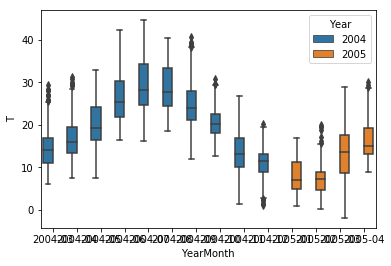

In [65]:
sns.boxplot(x="YearMonth", y="T", hue="Year", data=dfc)

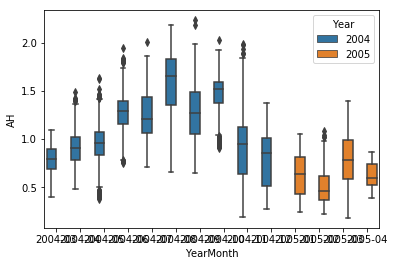

In [66]:
sns.boxplot(x="YearMonth", y="AH", hue="Year", data=dfc)

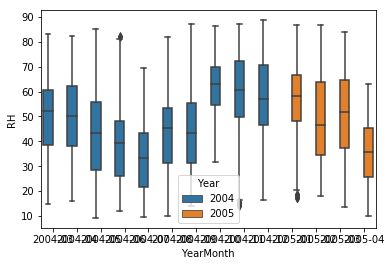

In [67]:
sns.boxplot(x="YearMonth", y="RH", hue="Year", data=dfc)

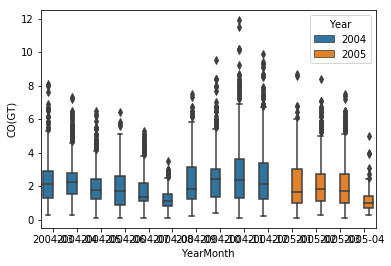

In [68]:
sns.boxplot(x="YearMonth", y="CO(GT)", hue="Year", data=dfc)

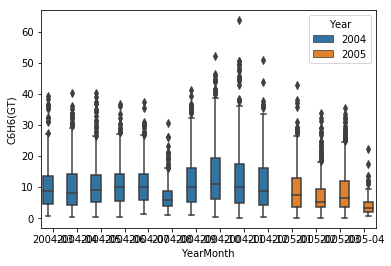

In [70]:
sns.boxplot(x="YearMonth", y="C6H6(GT)", hue="Year", data=dfc)

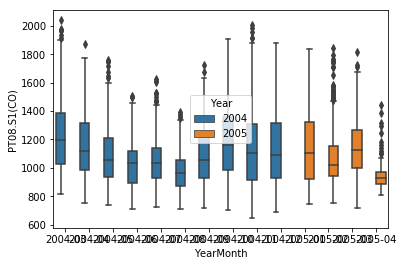

In [72]:
sns.boxplot(x="YearMonth", y="PT08.S1(CO)", hue="Year", data=dfc)

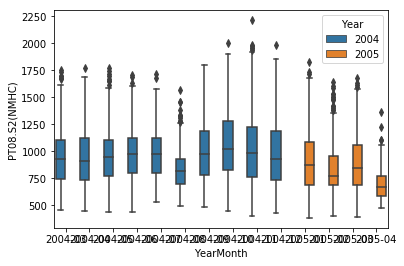

In [73]:
sns.boxplot(x="YearMonth", y="PT08.S2(NMHC)", hue="Year", data=dfc)

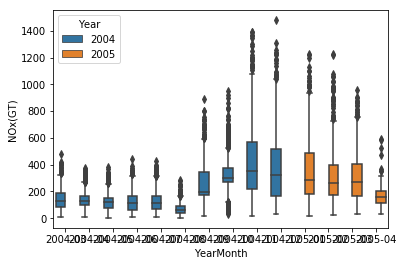

In [78]:
sns.boxplot(x="YearMonth", y="NOx(GT)", hue="Year", data=dfc)

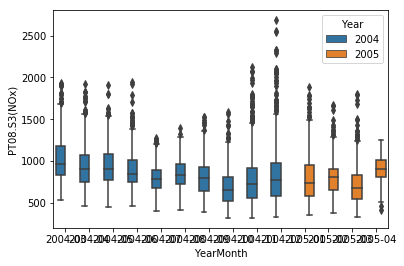

In [74]:
sns.boxplot(x="YearMonth", y="PT08.S3(NOx)", hue="Year", data=dfc)

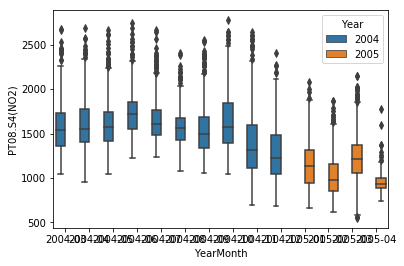

In [76]:
sns.boxplot(x="YearMonth", y="PT08.S4(NO2)", hue="Year", data=dfc)

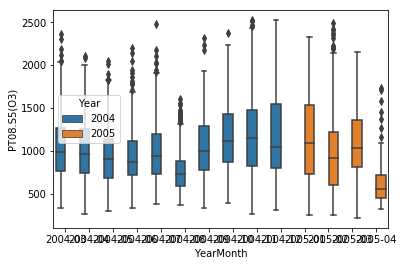

In [77]:
sns.boxplot(x="YearMonth", y="PT08.S5(O3)", hue="Year", data=dfc)

The above boxplots shows us the is a visual representation of a five point summary, and also show us the outliers, which are taken using the calculation < 1.5 times lower quartile and >1.5 times the higher quartile.
So the small stars above or below the boxes are outliers. This gives us a quick insight into what are the potential row values or groups which have certain potential outliers, as they are significantly away from the quartile values(Lower and Higher). 

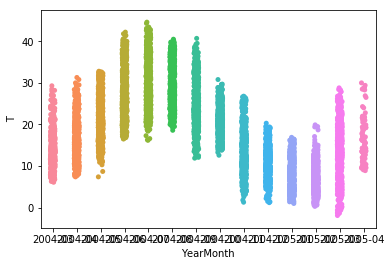

In [72]:
sns.stripplot(x="YearMonth", y="T", data=dfc, jitter =True)

We can also check if the change in gas concentrations over time has any effect on the temperature change. So to do this, we need new variables which are the difference of consecutive values of gas concentrations compared with difference of values of temperature to compare if both differenced parameters have any relationship between them.

In [79]:
dfc['dCO'] = dfc['CO(GT)'] - dfc['CO(GT)'].shift(-1)

In [80]:
dfc['dT'] = dfc['T'] - dfc['T'].shift(-1)

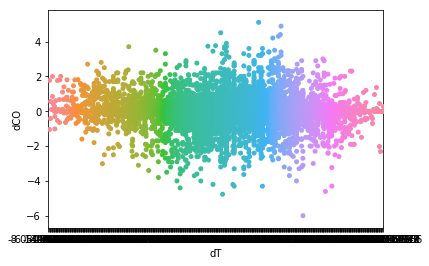

In [81]:
sns.stripplot(x="dT", y="dCO", data=dfc, jitter = True)
#sns.stripplot(x="dT", y="dCO", data=dfc, jitter = True)

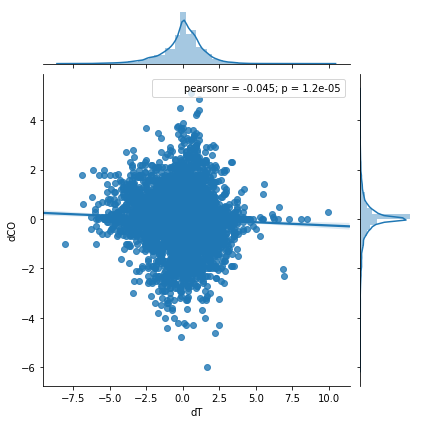

In [82]:
sns.jointplot(x="dT", y="dCO", data=dfc, kind="reg")

As from the above plots, there is no related variation between the change in CO concentration with the change in T over time.

In [83]:
dfc['dNO2'] = dfc['NO2(GT)'] - dfc['NO2(GT)'].shift(-1)

In [84]:
dfc['dNOx'] = dfc['NOx(GT)'] - dfc['NOx(GT)'].shift(-1)

In [85]:
dfc['dC6H6'] = dfc['C6H6(GT)'] - dfc['C6H6(GT)'].shift(-1)

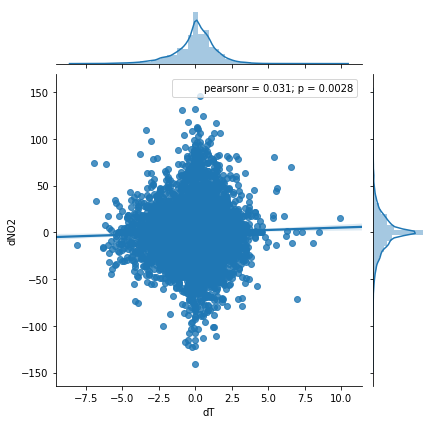

In [86]:
sns.jointplot(x="dT", y="dNO2", data=dfc, kind="reg")

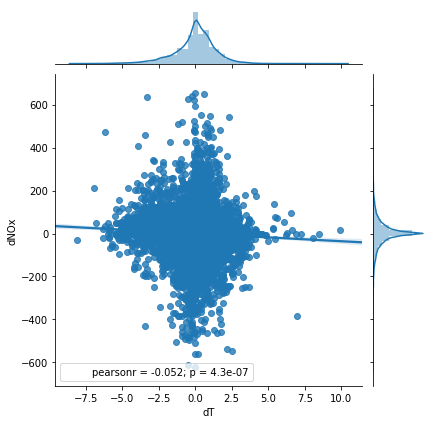

In [87]:
sns.jointplot(x="dT", y="dNOx", data=dfc, kind="reg")

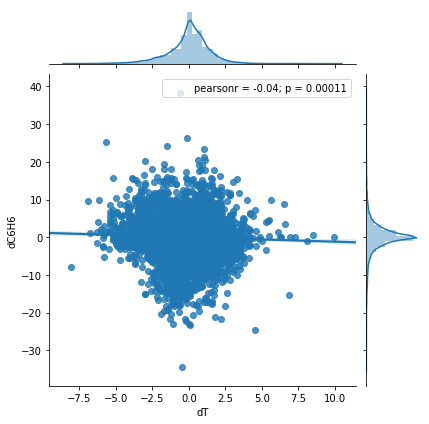

In [88]:
sns.jointplot(x="dT", y="dC6H6", data=dfc, kind="reg")